# Advent of Code 2022 with Pandas

* https://adventofcode.com/2022/

In [1]:
import pandas as pd
import numpy as np

def display_data(day, n):
    '''
    Displays the top n lines from day data
    
    Example
    -------
    display_data(1, 10) # displays the top 10 lines from the first day's data
    '''
    with open(f'data/day{day}.txt') as f:
        for _ in range(n):
            print(f.readline(), end='')

# Day 1a

Find max total in a group. Each group is separated by a blank line in the file.

In [2]:
display_data(1, 20)

9524
12618
6755
2121
12876
11330

4029
11446
11571
2683
3454
12411

6226
9901
6735
7602
4045
4643


In [3]:
s = pd.read_csv('data/day1.txt', header=None, 
                skip_blank_lines=False).squeeze()
s.head(20)

0      9524.0
1     12618.0
2      6755.0
3      2121.0
4     12876.0
5     11330.0
6         NaN
7      4029.0
8     11446.0
9     11571.0
10     2683.0
11     3454.0
12    12411.0
13        NaN
14     6226.0
15     9901.0
16     6735.0
17     7602.0
18     4045.0
19     4643.0
Name: 0, dtype: float64

In [4]:
groups = s.isna().cumsum()
groups.head(20)


0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    2
14    2
15    2
16    2
17    2
18    2
19    2
Name: 0, dtype: int64

In [5]:
group_total = s.groupby(groups).sum()
group_total.head()

0
0    55224.0
1    45594.0
2    46528.0
3    44989.0
4    34883.0
Name: 0, dtype: float64

In [6]:
group_total.max()

73211.0

# Day 1b

Total the largest 3 groups

In [7]:
group_total.nlargest(3).sum()

213958.0

## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

# Day 2a 

Play rock, paper, scissors vs opponent
* First column opponent
    * A - rock
    * B - paper
    * C - scissors
* Second column you
    * X - rock
    * Y - paper
    * Z - scissors
    
The score for a single round is the score for the shape you selected (1 for Rock, 2 for Paper, and 3 for Scissors) plus the score for the outcome of the round (0 if you lost, 3 if the round was a draw, and 6 if you won).

In [8]:
display_data(2, 10)

A Y
B Y
B Z
B Z
B X
B Z
C Y
A Z
C X
C X


In [9]:
s = pd.read_csv('data/day2.txt', header=None).squeeze()
s.head(10)

0    A Y
1    B Y
2    B Z
3    B Z
4    B X
5    B Z
6    C Y
7    A Z
8    C X
9    C X
Name: 0, dtype: object

In [10]:
s.replace({'A X': 4,
           'A Y': 8,
           'A Z': 3,
           'B X': 1,
           'B Y': 5,
           'B Z': 9,
           'C X': 7,
           'C Y': 2,
           'C Z': 6}).sum()

15422

## Day 2b

* X - lose
* Y - draw
* Z - win

In [11]:
s.replace({'A X': 3,
           'A Y': 4,
           'A Z': 8,
           'B X': 1,
           'B Y': 5,
           'B Z': 9,
           'C X': 2,
           'C Y': 6,
           'C Z': 7}).sum()

15442

## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

## Advent of Code with Pandas 
## Day 3a

* Find letter that appears in both first and last half of each string
* Convert letter to integer (1 to 52) based on a-z,A-Z

In [12]:
display_data(3, 5)

FzQrhQpJtJMFzlpplrTWjTnTTrjVsVvvTnTs
mScqSqqgcfPCqGPZcfGNSvTNsVVNSjNvWSNsNz
fPcPGqgCcHgFzQpJJtHtJH
DZDqqlrjplDHrNCmnBcHBMCRcJzb
RQFLStFvdcBbzdJbJM


In [13]:
s = pd.read_csv('data/day3.txt', header=None).squeeze()
s.head()

0      FzQrhQpJtJMFzlpplrTWjTnTTrjVsVvvTnTs
1    mScqSqqgcfPCqGPZcfGNSvTNsVVNSjNvWSNsNz
2                    fPcPGqgCcHgFzQpJJtHtJH
3              DZDqqlrjplDHrNCmnBcHBMCRcJzb
4                        RQFLStFvdcBbzdJbJM
Name: 0, dtype: object

In [14]:
s.apply(lambda x: x[:len(x) // 2])

0          FzQrhQpJtJMFzlpplr
1         mScqSqqgcfPCqGPZcfG
2                 fPcPGqgCcHg
3              DZDqqlrjplDHrN
4                   RQFLStFvd
                ...          
295    ntRJQVRfcQhcQWhnchBJWn
296        hQfcfCBSwCccVJhSJn
297                  vgvWDMZv
298      tSdtjLHLQLHjdFdDddQS
299                 tbRjtTLFR
Name: 0, Length: 300, dtype: object

In [15]:
half1 = s.apply(lambda x: x[:len(x) // 2]).str.get_dummies('')
half1

,B,C,D,F,G,H,J,L,M,N,...,m,n,p,q,r,s,t,v,w,z
0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
296,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
297,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
298,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
half2 = s.apply(lambda x: x[len(x) // 2:]).str.get_dummies('')
half2

,B,C,D,F,G,H,J,L,M,N,...,m,n,p,q,r,s,t,v,w,z
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,1,1,0,0,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
296,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
297,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
298,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [17]:
df = half1 * half2
df.head()

,B,C,D,F,G,H,J,L,M,N,...,m,n,p,q,r,s,t,v,w,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
s1 = df.idxmax(axis=1)
s1

0      r
1      S
2      H
3      H
4      d
      ..
295    t
296    C
297    g
298    Q
299    T
Length: 300, dtype: object

In [19]:
from string import ascii_letters
letter_map = dict(zip(ascii_letters, range(1, 53)))
df.idxmax(axis=1).replace(letter_map).sum()

7908

## Day 3b

* Group together three consecutive lines and find common letter

In [20]:
s.head(6)

0              FzQrhQpJtJMFzlpplrTWjTnTTrjVsVvvTnTs
1            mScqSqqgcfPCqGPZcfGNSvTNsVVNSjNvWSNsNz
2                            fPcPGqgCcHgFzQpJJtHtJH
3                      DZDqqlrjplDHrNCmnBcHBMCRcJzb
4                                RQFLStFvdcBbzdJbJM
5    PThQtwftTPFvtTPhvtFtfFtpZZllwjRNlsqNqqZjwpGlrZ
Name: 0, dtype: object

In [21]:
s.groupby(s.index // 3).apply(lambda x: x.str.get_dummies('').prod().idxmax()).replace(letter_map).sum()

2838

## Step-by-step

In [22]:
s.index // 3

Int64Index([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,
            ...
            96, 97, 97, 97, 98, 98, 98, 99, 99, 99],
           dtype='int64', length=300)

In [23]:
(s.groupby(s.index // 3)
  .apply(lambda x: x.str.get_dummies(''))).head(3)

,C,F,G,H,J,M,N,P,Q,S,...,t,v,z,B,D,L,R,b,d,w
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
(s.groupby(s.index // 3)
  .apply(lambda x: x.str.get_dummies('').prod())).head()

0  C    0
   F    0
   G    0
   H    0
   J    0
Name: 0, dtype: int64

In [25]:
(s.groupby(s.index // 3)
  .apply(lambda x: x.str.get_dummies('').prod().idxmax())).head(3)

0    z
1    R
2    d
Name: 0, dtype: object

In [26]:
(s.groupby(s.index // 3)
  .apply(lambda x: x.str.get_dummies('').prod().idxmax())
  .replace(letter_map)).head(3)

0    26
1    44
2     4
Name: 0, dtype: int64

In [27]:
(s.groupby(s.index // 3)
  .apply(lambda x: x.str.get_dummies('').prod().idxmax())
  .replace(letter_map)
  .sum())

2838

# Wild Pandas Maneuvering

## Advent of Code Day 3 Solution

In [28]:
s.head()

0      FzQrhQpJtJMFzlpplrTWjTnTTrjVsVvvTnTs
1    mScqSqqgcfPCqGPZcfGNSvTNsVVNSjNvWSNsNz
2                    fPcPGqgCcHgFzQpJJtHtJH
3              DZDqqlrjplDHrNCmnBcHBMCRcJzb
4                        RQFLStFvdcBbzdJbJM
Name: 0, dtype: object

In [29]:
s.apply(set)

0      {J, p, M, v, l, T, z, t, n, s, W, V, r, h, j, ...
1      {v, q, c, P, m, f, T, g, S, z, N, s, G, Z, V, ...
2             {J, p, q, c, P, f, H, g, z, t, Q, G, F, C}
3      {M, c, H, z, j, J, R, p, B, m, D, N, n, Z, r, ...
4             {J, R, v, B, c, M, z, S, t, d, b, F, Q, L}
                             ...                        
295    {c, T, z, V, h, W, J, R, p, B, m, D, N, n, Z, ...
296    {c, V, h, J, B, n, r, w, b, Q, C, l, P, f, S, ...
297                 {p, v, M, c, q, P, D, g, s, Z, G, W}
298    {q, l, P, c, H, D, S, t, d, s, G, w, h, j, F, ...
299           {R, v, B, T, M, D, t, Z, V, b, r, j, F, L}
Name: 0, Length: 300, dtype: object

In [30]:
ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [31]:
from operator import and_
from functools import reduce
from string import ascii_letters

(s.apply(set)
  .groupby(s.index // 3)
  .apply(lambda x: ascii_letters.find(*reduce(and_, x)) + 1)
  .sum())

2838

In [32]:
(s.apply(set)
  .groupby(s.index // 3)
  .apply(lambda x: ascii_letters.find(*set.intersection(*x)) + 1)
  .sum())

2838

## Advent of Code with Pandas

## Day 4

Find complete overlapping intervals

In [33]:
display_data(day=4, n=5)

51-88,52-87
41-55,22-56
6-74,74-86
51-98,52-86
8-77,3-94


In [34]:
df = pd.read_csv('data/day4.txt', 
                 sep=',|-', 
                 engine='python', 
                 header=None, 
                 names=['left_min', 'left_max', 'right_min', 'right_max'])
df.head()

,left_min,left_max,right_min,right_max
0,51,88,52,87
1,41,55,22,56
2,6,74,74,86
3,51,98,52,86
4,8,77,3,94


In [35]:
df.query('(left_min >= right_min and left_max <= right_max) or '
         '(right_min >= left_min and right_max <= left_max)').head()

,left_min,left_max,right_min,right_max
0,51,88,52,87
1,41,55,22,56
3,51,98,52,86
4,8,77,3,94
6,29,42,29,35


## Day 4b

Find any overlapping intervals

In [36]:
df.query('not (left_max < right_min or right_max < left_min)').head()

,left_min,left_max,right_min,right_max
0,51,88,52,87
1,41,55,22,56
2,6,74,74,86
3,51,98,52,86
4,8,77,3,94


In [37]:
df.query('right_min <= left_min <= right_max or '
         'right_min <= left_max <= right_max or '
         'left_min <= right_min <= left_max or '
         'left_min <= right_max <= left_max').head()

,left_min,left_max,right_min,right_max
0,51,88,52,87
1,41,55,22,56
2,6,74,74,86
3,51,98,52,86
4,8,77,3,94


## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

## Advent of Code with Pandas - Day 5

Move crates from one stack to another in reverse order

In [38]:
display_data(5, 20)

            [J]             [B] [W]
            [T]     [W] [F] [R] [Z]
        [Q] [M]     [J] [R] [W] [H]
    [F] [L] [P]     [R] [N] [Z] [G]
[F] [M] [S] [Q]     [M] [P] [S] [C]
[L] [V] [R] [V] [W] [P] [C] [P] [J]
[M] [Z] [V] [S] [S] [V] [Q] [H] [M]
[W] [B] [H] [F] [L] [F] [J] [V] [B]
 1   2   3   4   5   6   7   8   9 

move 3 from 5 to 7
move 2 from 8 to 9
move 4 from 3 to 5
move 2 from 1 to 7
move 1 from 3 to 6
move 2 from 1 to 7
move 1 from 8 to 7
move 4 from 2 to 8
move 10 from 9 to 1
move 6 from 6 to 2


In [39]:
df_crates = (pd.read_csv('data/day5.txt', nrows=8, header=None)
               .squeeze()
               .str.split(r'\s{1,4}', expand=True)
               .replace({'': np.nan, '[\[\]]': ''}, regex=True)
            )
df_crates

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,J,NaN,NaN,NaN,B,W
1,NaN,NaN,NaN,T,NaN,W,F,R,Z
2,NaN,NaN,Q,M,NaN,J,R,W,H
3,NaN,F,L,P,NaN,R,N,Z,G
4,F,M,S,Q,NaN,M,P,S,C
5,L,V,R,V,W,P,C,P,J
6,M,Z,V,S,S,V,Q,H,M
7,W,B,H,F,L,F,J,V,B


Shift each column up to the top

In [40]:
n_not_missing = df_crates.notna().sum().sum()
df_crates = df_crates.apply(lambda x: x.shift(-x.isna().sum())).reindex(range(n_not_missing))
df_crates

,0,1,2,3,4,5,6,7,8
0,F,F,Q,J,W,W,F,B,W
1,L,M,L,T,S,J,R,R,Z
2,M,V,S,M,L,R,N,W,H
3,W,Z,R,P,NaN,M,P,Z,G
4,NaN,B,V,Q,NaN,P,C,S,C
5,NaN,NaN,H,V,NaN,V,Q,P,J
6,NaN,NaN,NaN,S,NaN,F,J,H,M
7,NaN,NaN,NaN,F,NaN,NaN,NaN,V,B
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_moves = pd.read_csv('data/day5.txt', header=None, skiprows=10, 
                 sep='\D+', engine='python', 
                )
df_moves = df_moves.drop(columns=0)
df_moves.columns = ['move', 'from', 'to']
df_moves[['from', 'to']] -= 1
df_moves.head()

,move,from,to
0,3,4,6
1,2,7,8
2,4,2,4
3,2,0,6
4,1,2,5


In [42]:
df_crates.head(10)

,0,1,2,3,4,5,6,7,8
0,F,F,Q,J,W,W,F,B,W
1,L,M,L,T,S,J,R,R,Z
2,M,V,S,M,L,R,N,W,H
3,W,Z,R,P,NaN,M,P,Z,G
4,NaN,B,V,Q,NaN,P,C,S,C
5,NaN,NaN,H,V,NaN,V,Q,P,J
6,NaN,NaN,NaN,S,NaN,F,J,H,M
7,NaN,NaN,NaN,F,NaN,NaN,NaN,V,B
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
def move_crates(s, order):
    move, from_, to = s
    df_crates[to] = df_crates[to].shift(move)
    df_crates.iloc[:move, to] = df_crates.iloc[:move, from_][::order]
    df_crates[from_] = df_crates[from_].shift(-move)

In [44]:
df_moves.apply(move_crates, axis=1, order=-1)

0      None
1      None
2      None
3      None
4      None
       ... 
496    None
497    None
498    None
499    None
500    None
Length: 501, dtype: object

In [45]:
df_crates.head(10)

,0,1,2,3,4,5,6,7,8
0,V,R,W,B,S,F,Z,W,M
1,H,R,F,C,H,Z,Q,N,NaN
2,L,M,NaN,S,M,Z,W,NaN,NaN
3,S,W,NaN,V,J,G,V,NaN,NaN
4,R,P,NaN,NaN,H,M,T,NaN,NaN
5,V,F,NaN,NaN,J,P,P,NaN,NaN
6,S,M,NaN,NaN,V,R,L,NaN,NaN
7,F,J,NaN,NaN,NaN,Q,Q,NaN,NaN
8,L,P,NaN,NaN,NaN,NaN,C,NaN,NaN
9,B,B,NaN,NaN,NaN,NaN,F,NaN,NaN


In [46]:
df_crates.iloc[0].sum()

'VRWBSFZWM'

## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

## Day 5b

Move the crates in the same order

In [47]:
df_crates = (pd.read_csv('data/day5.txt', nrows=8, header=None)
               .squeeze().str.split(r'\s{1,4}', expand=True)
               .replace({'': np.nan, '[\[\]]': ''}, regex=True))
n_not_missing = df_crates.notna().sum().sum()
df_crates = df_crates.apply(lambda x: x.shift(-x.isna().sum())).reindex(range(n_not_missing))

In [48]:
df_moves.apply(move_crates, axis=1, order=1)

0      None
1      None
2      None
3      None
4      None
       ... 
496    None
497    None
498    None
499    None
500    None
Length: 501, dtype: object

In [49]:
df_crates.head()

,0,1,2,3,4,5,6,7,8
0,R,B,T,W,J,W,M,C,F
1,H,F,M,F,W,J,R,P,NaN
2,S,R,NaN,C,P,M,V,NaN,NaN
3,M,B,NaN,S,Z,G,Z,NaN,NaN
4,Q,P,NaN,NaN,S,P,L,NaN,NaN


In [50]:
df_crates.iloc[0].sum()

'RBTWJWMCF'

## Advent of Code Day 6

Find location of the first 4 consecutive unique characters

In [51]:
display_data(6, 1)

hrbbjllllspssblslvvrdrbbpbbmcccfppvbbwvbbmrmjrjrfrgfgbffgfqfqlltlwttscsncscchssrppffvwwvvpnnwwwpvwvhhnvhhbttvzzdlzdlzzwmmjhhznnjdnnnqddbtdbdbsdsmdsdrrdpdwpdppgcgqgcctftsfszslljbljbjwbwbnwnqqrnnztntmtrmmzwzdwzwgwwwjhjsjgjtjjhpjhhppqzqdqffrvrtvvsmmgwmgwgbbclltctptzpzhpzptzppcfpcfftflfzftztddzgzmmfsmsrmmsstttvbvmbvvsmsqmqlldjdtthwtwbwggrzzjrzrcctffsshqshhpthhlnhlhqhdqqrwrmmcttpfttzfzgzdgdzzwrrtsrrsnrnccrbbsssbpbjjvzzwlwtwjwsjwjggzqgzzrsszzjnzjzwjzzcrzczncnqqztzfzhfhvvtjvjdvjjmrjrppvzppczpczcggshghvhnhhsrsnsdszzdpzpzlpzzhwwmnwmwmcwwfnwfwjjcbcncllcsllqdqzzhqhmqmbbjvjjwwcjjpnpllzfzddtmtccqrcrtrwrpphpmpplslmltthnnvhhvrvbblhhrrdqqmbqqgtqggdgcdcvvsbsswvvpggbbtftlflglzlmlbbfhhrshswhshffhhdnnrfrvrmrnrprrmfmpmnpnfnggvvcncdcrczrzccpmmssrbbdjdtdrdwrrwhrrvrtvvszvvwvzzmhhjhhwlhlqlvlttzftztdtstftrfrdddmtmzzsqzqvvpdpdcpcncnrrtntznzrzgznztnznhhsqqnrqrhhlzhzthhfddrzdrrqmqggcmmllnjjvwwjccfjfqfcfzccwvcwvcvjcjtjtnnqsqmqrmrzrszrszzfwfggnmmcdmdjmmhwwgfwfnwnlwwcffsrffvnvbvnvwnwgnwnmmbzbmbpplmplpspzpmzpzdzgzrzrt

In [52]:
s = pd.read_csv('data/day6.txt', header=None)[0].str.split('', expand=True).squeeze()
s = s.iloc[1: -1].apply(ord)
s

1       104
2       114
3        98
4        98
5       106
       ... 
4091     98
4092    118
4093    118
4094    119
4095     99
Name: 0, Length: 4095, dtype: int64

In [53]:
s.rolling(4).apply(lambda x: x.nunique()).idxmax()

1155

## Day 6b

Find location of the first 14 consecutive unique characters

In [54]:
s.rolling(14).apply(lambda x: x.nunique()).idxmax()

2789

### Alternate (easier) data read

In [55]:
s = pd.Series(list(open('data/day6.txt').read()))
s.head()

0    h
1    r
2    b
3    b
4    j
dtype: object

## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

## Day 7

* Given file system commands and output of directories and files with sizes
* Find all directories less than 100_000 and sum them up

In [56]:
display_data(7, 35)

$ cd /
$ ls
dir dscbfp
283653 fsdfddfv
dir mjzqq
241330 rcm.psp
dir sjbpgc
dir zfsbvs
$ cd dscbfp
$ ls
dir fgtvzpl
dir hgfrgbv
dir hmwqgjnl
dir jvr
dir lcvdgm
dir mmhtpz
dir wqc
dir znl
dir zph
dir zwlpm
$ cd fgtvzpl
$ ls
dir fvrghzfg
28513 lbbg.rhq
$ cd fvrghzfg
$ ls
212295 cjb.nwg
dir ftqs
$ cd ftqs
$ ls
250415 mmhtpz
$ cd ..
$ cd ..
$ cd ..
$ cd hgfrgbv


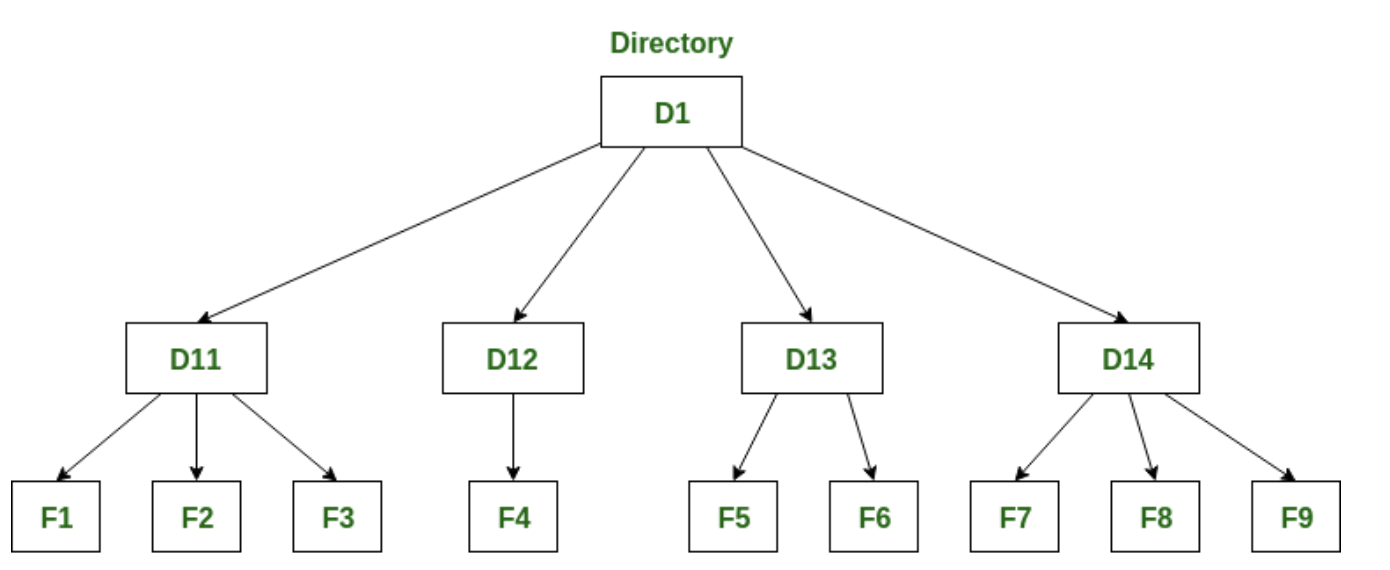

credit: https://www.geeksforgeeks.org/structures-of-directory-in-operating-system/

In [57]:
class Node:
    def __init__(self, parent, children, size, total_size, is_dir):
        self.parent:     Node = parent
        self.children:   dict['str', Node] = children
        self.size:       int = size
        self.total_size: int = total_size
        self.is_dir:     bool = is_dir

with open('data/day7.txt') as f:
    f.readline()
    cur_dir = Node(parent=None, children={}, size=0, total_size=0, is_dir=True)
    top_dir = {'/': cur_dir}
    for line in f:
        cur_line = line.strip('\n')
        if cur_line == '$ ls':
            pass
        elif cur_line == '$ cd ..':
            cur_dir = cur_dir.parent
        elif cur_line.startswith('$ cd '):
            dir_name = cur_line[5:]
            cur_dir = cur_dir.children[dir_name]
        elif cur_line.startswith('dir'):
            name = cur_line.split(' ')[1]
            if name not in cur_dir.children:
                # just in case dir has already been traversed
                cur_dir.children[name] = Node(parent=cur_dir, children={}, size=0, total_size=0, is_dir=True)
        else:
            # file
            size, name = cur_line.split(' ')
            size = int(size)
            cur_node = Node(parent=cur_dir, children=None, size=size, total_size=size, is_dir=False)
            cur_dir.children[name] = cur_node
            
            parent = cur_node.parent
            while parent:
                parent.total_size += size
                parent = parent.parent

In [58]:
top_dir

{'/': <__main__.Node at 0x12922fdc0>}

In [59]:
def print_nodes(node_dict, level):
    for name, node in node_dict.items():
        print('\t' * level, name, node.size, node.total_size)
        if node.children:
            print_nodes(node.children, level + 1)

print_nodes(top_dir, 0)

 / 0 44804833
	 dscbfp 0 43189731
		 fgtvzpl 0 491223
			 fvrghzfg 0 462710
				 cjb.nwg 212295 212295
				 ftqs 0 250415
					 mmhtpz 250415 250415
			 lbbg.rhq 28513 28513
		 hgfrgbv 0 261683
			 cdrgnzrz.hwf 86365 86365
			 wqtmwb 175318 175318
		 hmwqgjnl 0 11152310
			 dscbfp 0 146043
				 wpzr 146043 146043
			 dwtfrgj 0 1074256
				 jwmw 0 943186
					 dscbfp 0 167704
						 mmhtpz 0 167704
							 mdrddz 0 167704
								 fgjsq.bpb 167704 167704
					 lbbg.phv 243410 243410
					 mmhtpz 0 532072
						 dtcmsq.pdl 233626 233626
						 jczs.rgg 163642 163642
						 msfmjd.vlr 111667 111667
						 ndhvh.jbq 23137 23137
				 pntqg 0 131070
					 lnjvpcgq.zqs 68578 68578
					 rcm.psp 62492 62492
			 fnl.whg 130223 130223
			 mtcv 66339 66339
			 rgvvz 0 9735449
				 hmwqgjnl 0 718585
					 bsgljmww.whq 141962 141962
					 hsmr 0 229737
						 fzptbrzb.lqv 229737 229737
					 msfmjd.vlr 123313 123313
					 rcm.psp 223573 223573
				 jrjgnch 0 340366
					 lbbg.fzh 4426 4426
					 zb

In [60]:
def get_all_sizes(node_dict, size_list=[]):
    for name, node in node_dict.items():
        if node.is_dir:
            size_list.append(node.total_size)
        if node.children:
            get_all_sizes(node.children, size_list)
    return pd.Series(size_list)

In [61]:
s = get_all_sizes(top_dir, [])
s[s <= 100_000].sum()

1297683

## Day 7b

In [62]:
s

0      44804833
1      43189731
2        491223
3        462710
4        250415
         ...   
186      207413
187       73862
188      456261
189       25218
190       25218
Length: 191, dtype: int64

In [63]:
val = 30_000_000 - (70_000_000 - s.max())
val

4804833

In [64]:
s.mask(s < val).min()

5756764.0

## Day 8

* How many trees can you see from the edge?
* Each number is a tree

In [65]:
display_data(8, 5)

313213123212200312011243203120214010202554420335045116203101005212525131015305511140012431022113113
222021333112322244231542054023354511304431216312534453560105660253445311020244233130144313440030322
200012220300132310233100025524032003355144536126232161330106115213441450552235514000243120210031130
102111124044033113241415155401056014506203413216651520206613342353052505445000321043121021430440021
221134021010031320101542213340113552161113350123516154134654046250223033000413443321231233142213010


In [66]:
df = pd.read_fwf('data/day8.txt', header=None, widths=[1] * 99)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,3,1,3,2,1,3,1,2,3,2,...,1,0,2,2,1,1,3,1,1,3
1,2,2,2,0,2,1,3,3,3,1,...,3,4,4,0,0,3,0,3,2,2
2,2,0,0,0,1,2,2,2,0,3,...,0,2,1,0,0,3,1,1,3,0
3,1,0,2,1,1,1,1,2,4,0,...,1,4,3,0,4,4,0,0,2,1
4,2,2,1,1,3,4,0,2,1,0,...,3,1,4,2,2,1,3,0,1,0
5,1,1,2,2,4,1,2,3,3,1,...,4,0,1,4,1,3,1,1,3,3
6,1,3,2,2,1,1,1,3,0,1,...,1,1,4,4,0,4,3,0,3,1
7,3,2,3,1,4,0,3,2,0,0,...,4,3,1,4,4,0,4,1,1,2
8,0,1,4,0,1,3,2,4,2,0,...,1,0,4,4,4,4,1,2,2,0
9,2,3,3,4,1,4,0,3,0,1,...,3,1,1,2,3,4,2,0,3,0


In [67]:
top = (df > df.cummax().shift().fillna(-1))
left = (df > df.cummax(axis=1).shift(axis=1).fillna(-1))
bottom = (df > df[::-1].cummax()[::-1].shift(-1).fillna(-1))
right = (df > df.iloc[:, ::-1].cummax(axis=1)
                .iloc[:, ::-1].shift(-1, axis=1).fillna(-1))
(top | left | bottom | right).sum().sum()

1715

## Master Data Analysis with Python

[Comprehensive text on doing data analysis with Pandas][1]

* 500+ exercises
* Video lessons
* Certification exams

[1]: https://dunderdata.com/master-data-analysis-with-python

# 8b

* Find number of other trees you can see from each tree in all four directions (top, bottom, left, right)
* Multiply these four numbers together

In [68]:
df = pd.read_fwf('data/day8.txt', header=None, widths=[1] * 99)
# have first and last rows/columns act as a barrier
df.iloc[[0, -1]] = 9
df.iloc[:, [0, -1]] = 9

In [69]:
dfs = []
# create four iterations for above/below/right/left
for direction in (1, -1):
    for axis in (0, 1):
        # keep track of score at each position. Default to 1
        df_score = pd.DataFrame(np.full((99, 99), 1))
        # initial indicator
        ind = df_score.gt(0)
        for i in range(1, 99):
            # is current tree greater than tree above/below/right/left
            new_ind = df.diff(periods=i * direction, axis=axis).gt(0)
            ind = ind & new_ind
            # continually add indicator if still greater
            df_score += ind
        dfs.append(df_score)

In [70]:
(dfs[0] * dfs[1] * dfs[2] * dfs[3]).max().max()

374400